In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from feature_engine.selection import DropCorrelatedFeatures
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity
from fitter import Fitter

In [2]:
# Устанавливаем глобальное начальное состояние генератора случайных чисел
np.random.seed(42)

In [ ]:
df = pd.read_excel('data/data.xlsx')

In [5]:
# Проверяем количество уникальных значений в каждом столбце
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [6]:
# Выведем первые строки
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,173.630124,0.000000,0.0,0.0,0.0,0.0,0.0,9.984809,0.0,0.0,0.0,54.384066,74.032366,35.342864,0.000000,0.000000,11.423370,0.0,0.000000,43.480583,105.750639,13.089513,0.00000,0,0.0,0.000000,0.000000,0.0,0.0,24.512883,0.000000,33.495774,105.750639,9.984809,0.0,0.0,0,24.72,0.0,0.0,0.0,0.000000,21.659962,24.925325,64.208216,11.42337,0.0,41.542423,9.984809,0.00000,0.0,10.188192,0.000000,4.807589,1.764908,0.000000,13.258223,16.981087,0.000000,0.923077,28,0,2,4,0,4,0,0,0,2,0,2,7,4,0,4,4,7.1212,121.5300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127794,12.595754,12.595754,12.648545,12.

In [7]:
# Проверим размерность датасета
df.shape

(1001, 214)

In [8]:
# Проверим какие типы данных содержатся в датасете 
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [9]:
# Переименуем столбцы которые содержат запятые в названии
df = df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})

In [10]:
# Проверяем пропуски по каждому столбцу
df.columns[df.isna().any()].tolist()

['MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW']

In [11]:
# Заполним пропуски
imp = IterativeImputer()
df_imputed = imp.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)

# Проведем анализ данных

In [12]:
ds = Dataset(df, cat_features=[])

suite = data_integrity()
result = suite.run(ds)
result.save_as_html("data_integrity_report.html")
result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_7FN0IDFGUNUFAPI9GYL5PNFZS">Data Integrity Sui…

После анализа, можем сделать следующие выводы:

1. 18 колонок содержат только одно значение, их следует удалить.
2. Есть много пар с высокой корреляцией, их следует удалить.
3. Доля образцов, содержащих только спецсимволы, не превышает 0.1%.
4. В каждой колонке не более одного типа пропусков.
5. Нет значимого смешения типов данных в столбцах — все 214 столбцов чистые или с допустимыми вариациями.
6. Проверка выявила отсутствие значимых вариантов строковых значений.
7. Дубликаты данных отсутствуют.
8. Выбросы по длине строк не обнаружены, так как в данных отсутствуют релевантные строковые столбцы для такой проверки.

In [12]:
# Удалим столбцы с одним значением
single_value_cols = ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 
                     'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 
                     'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']

df = df.drop(columns=single_value_cols)

In [13]:
# Удалим столбец который не несет полезной информации
df = df.drop('Unnamed: 0', axis=1)

In [14]:
# IC50, CC50, и SI по своей природе должны быть строго положительными, поэтому удалим некорректные значения
df = df[(df['IC50'] > 0) & (df['CC50'] > 0) & (df['SI'] > 0)]

In [15]:
# Удаляем столбцы с высокой корреляцией
selector = DropCorrelatedFeatures(threshold=0.9)
df = selector.fit_transform(df)

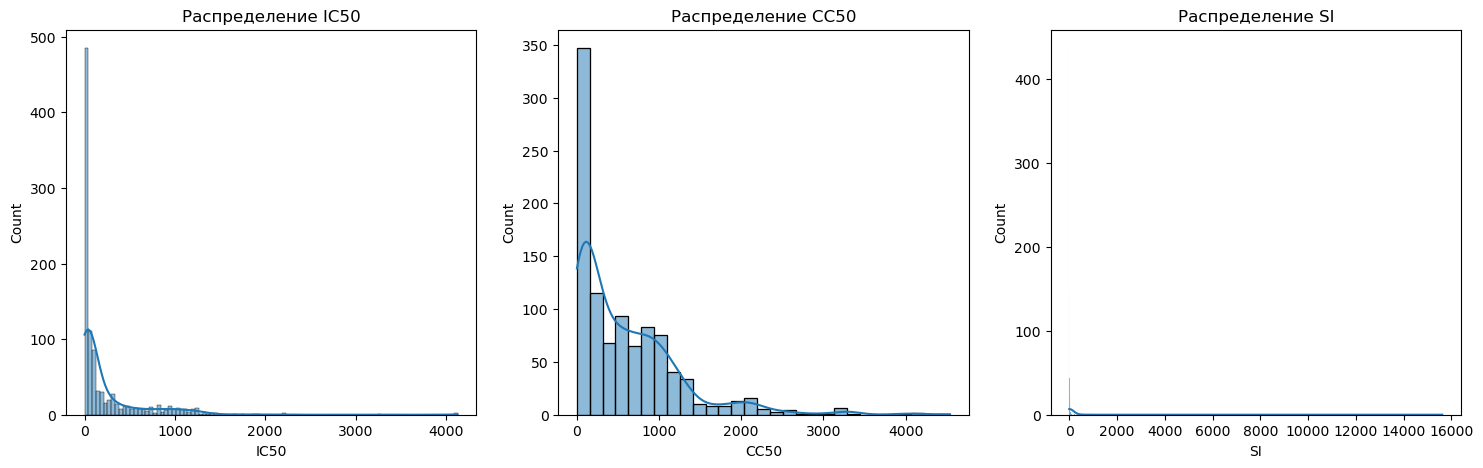

In [17]:
# Рассмотрим распределение целевых переменных
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['IC50', 'CC50', 'SI']):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')

* Распределения имеют выраженную правостороннюю асимметрию;  

* Большая часть значений сосредоточена в нижних диапазонах, в то время как длинный правый «хвост» уходит к очень большим значениям (например, IC50 до 4000).


Анализ распределения для IC50


2025-05-31 18:44:04.837 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=6.6e-05)
2025-05-31 18:44:04.844 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.000124)
2025-05-31 18:44:04.863 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=1e-05)
2025-05-31 18:44:04.917 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=3.8e-05)
2025-05-31 18:44:04.918 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=1.8e-05)



Анализ распределения для CC50


2025-05-31 18:44:05.909 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=5e-06)
2025-05-31 18:44:05.917 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=3e-06)
2025-05-31 18:44:05.919 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=1.4e-05)
2025-05-31 18:44:05.967 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=2e-06)
2025-05-31 18:44:05.986 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=2e-06)
2025-05-31 18:44:06.054 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=2e-06)
2025-05-31 18:44:06.086 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=3.2e-05)



Анализ распределения для SI


2025-05-31 18:44:06.115 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=1.7e-05)
2025-05-31 18:44:06.780 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=2.7e-05)
2025-05-31 18:44:06.794 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=3.2e-05)


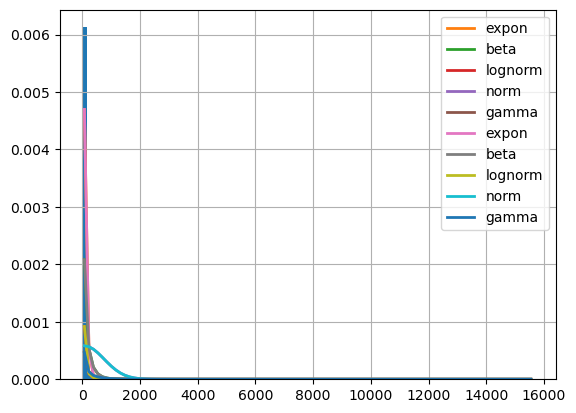

In [ ]:
# Проверим тип распределения у каждой целевой переменной
for col in ['IC50', 'CC50', 'SI']:
    print(f"\nАнализ распределения для {col}")
    f = Fitter(df[col].dropna(),
               distributions=['norm', 'lognorm', 'gamma', 'expon', 'beta'])
    f.fit()
    f.summary()
    f.plot_pdf()

* Для IC50 наименьшая ошибка подгонки у lognorm;

* Для CC50 наименьшая ошибка подгонки у lognorm и gamma;

* Для SI наименьшая ошибка подгонки у lognorm и beta.

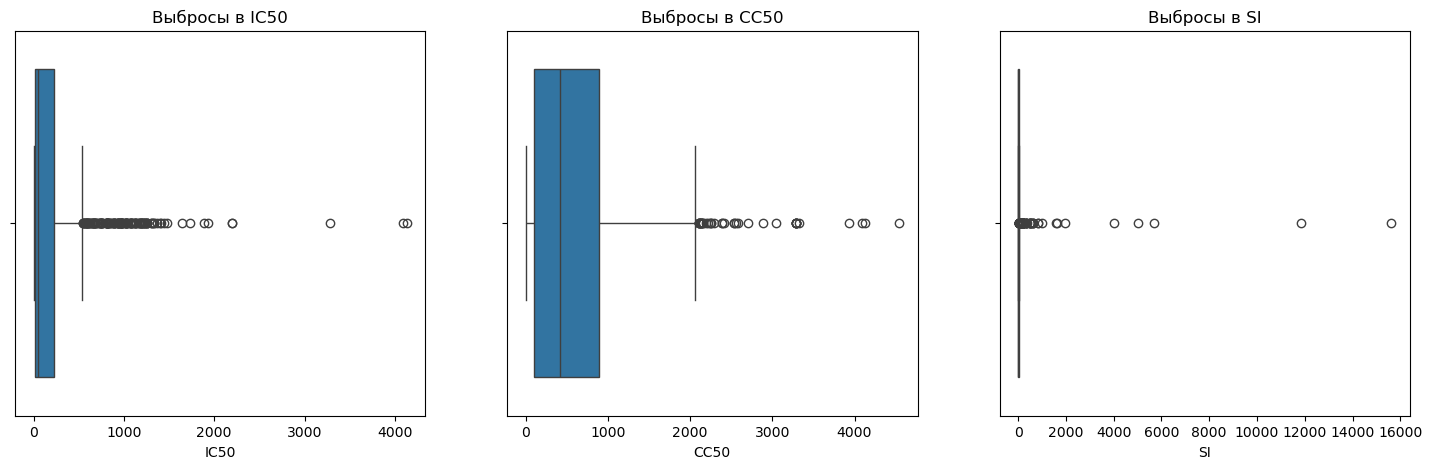

In [ ]:
# Рассмотрим выбросы целевых переменных
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['IC50', 'CC50', 'SI']):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Выбросы в {col}')

Во всех трёх случаях выбросы проявляются исключительно справа. Левый «ус» не имеет точек-выбросов.

Для каждой из целевых переменных — IC50, CC50 и SI — было проведено предварительное исследование распределения значений. Все три показателя имеют положительные значения и демонстрируют выраженный правосторонний скошенный характер распределения с длинным «хвостом» больших значений.

Для улучшения качества моделей и уменьшения влияния выбросов был рассмотрен подход с удалением выбросов с использованием межквартильного размаха (IQR).
Данный метод позволяет отфильтровать экстремальные значения за пределами интервала, сохраняя при этом основную часть данных.

In [20]:
# Удаление выбросов с помощью межквартильного размаха.Создаем три отдельных набора данных с выбросами, удалёнными только по соответствующей целевой переменной
def filter_outliers(df, target_column):
    Q1 = df[target_column].quantile(0.25)
    Q3 = df[target_column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return df[df[target_column] <= upper_bound]

df_ic50_iqr = filter_outliers(df, "IC50")
df_cc50_iqr = filter_outliers(df, "CC50")
df_si_iqr = filter_outliers(df, "SI")

После фильтрации выбросов были построены повторные boxplot-диаграммы.

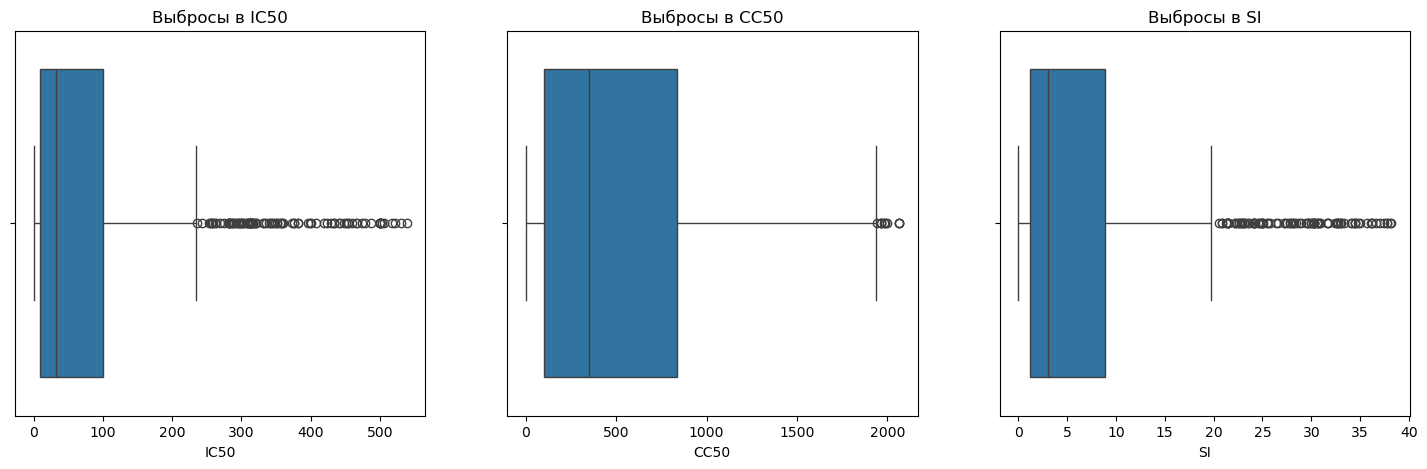

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

dataframes = [df_ic50_iqr, df_cc50_iqr, df_si_iqr]
columns = ['IC50', 'CC50', 'SI']

for i, (df_, col) in enumerate(zip(dataframes, columns)):
    sns.boxplot(x=df_[col], ax=axes[i])
    axes[i].set_title(f'Выбросы в {col}')

Из нового набора диаграмм видно:
* Правая граница «уса» значительно сократилась, выбросы, выходящие далеко вправо, отсутствуют;
* Левая сторона распределений по-прежнему не содержит выбросов, что согласуется с предыдущим анализом.


In [ ]:
# Удаляем ненужные целевые переменные из каждого набора
df_ic50_iqr = df_ic50_iqr.drop(columns=['SI'])
df_cc50_iqr = df_cc50_iqr.drop(columns=['SI'])
df_si_iqr   = df_si_iqr.drop(columns=['IC50', 'CC50'])

# Сохранение IQR-обработанных датафреймов
df_ic50_iqr.to_csv('data/df_ic50_iqr.csv', index=False)
df_cc50_iqr.to_csv('data/df_cc50_iqr.csv', index=False)
df_si_iqr.to_csv('data/df_si_iqr.csv', index=False)